In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
#visualisation libraries
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(style="seaborn")

import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.simplefilter("ignore")
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf

In [42]:
df_Italy=pd.read_csv("df_Italy_after21days_new.csv" ,encoding='unicode_escape')
df_Hungary=pd.read_csv("df_Hungary_after21days_new.csv" ,encoding='unicode_escape')
df_Germany=pd.read_csv("df_Germany_after21days_new.csv" ,encoding='unicode_escape')
df_Norway=pd.read_csv("df_Norway_after21days_new.csv" ,encoding='unicode_escape')
df_South_Korea=pd.read_csv("df_South_Korea_after21days_new.csv" ,encoding='unicode_escape')
df_India=pd.read_csv("df_India_after21days_new.csv" ,encoding='unicode_escape')

In [43]:
df_Italy.head()

,country,date,population,urbanPop%,#dailyTests,#testsTotal,#dailyTestsPerThousand,#testsTotalPerThousand,#tests7daySmooth,#tests7daySmoothPerThousand,...,H1PublicInformationCampaigns,H2TestingPolicy,H3ContactTracing,H4EmergencyInvestmentInHealthcare,H5InvestmentInVaccines,H6FacialCoverings,H7VaccinationPolicy,H8ProtectionOfElderlyPeople,mortality,mortalityafter21days
0,Italy,2020/1/1,60461826,69%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Italy,2020/1/2,60461826,69%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Italy,2020/1/3,60461826,69%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Italy,2020/1/4,60461826,69%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Italy,2020/1/5,60461826,69%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


                      stringencyIndex  mortalityafter21days
stringencyIndex              1.000000              0.177786
mortalityafter21days         0.177786              1.000000
                      stringencyIndex  mortalityafter21days
stringencyIndex              1.000000             -0.159803
mortalityafter21days        -0.159803              1.000000


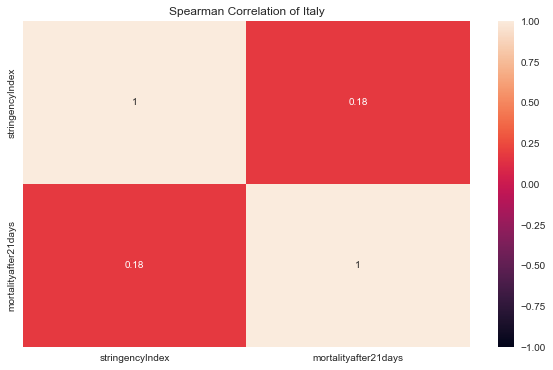

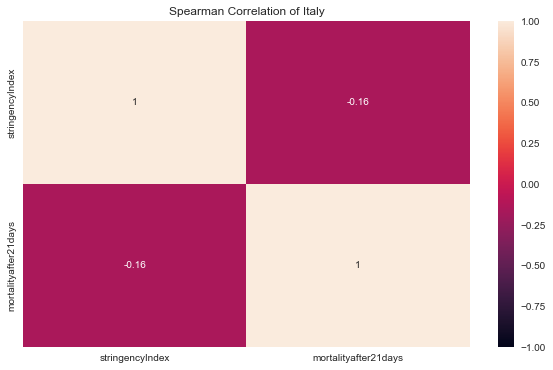

In [58]:
#Italy spearman correlation
x_simple_Italy = pd.DataFrame(df_Italy,columns=["stringencyIndex","mortalityafter21days"])
my_rs = x_simple_Italy.corr(method="spearman")
my_rp = x_simple_Italy.corr(method="pearson")
print(my_rs)
print(my_rp)
def display_correlation(df_Italy):
    r = df_Italy.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_Italy.corr(method="spearman"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Italy")
    return(r)
r_simple=display_correlation(x_simple_Italy)
def display_correlation(df_Italy):
    r = df_Italy.corr(method="pearson")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_Italy.corr(method="pearson"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Italy")
    return(r)
r_simple=display_correlation(x_simple_Italy)

                      stringencyIndex  mortalityafter21days
stringencyIndex               1.00000               0.06956
mortalityafter21days          0.06956               1.00000
                      stringencyIndex  mortalityafter21days
stringencyIndex              1.000000              0.356131
mortalityafter21days         0.356131              1.000000


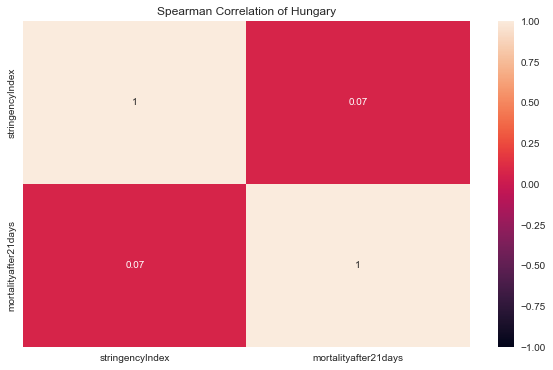

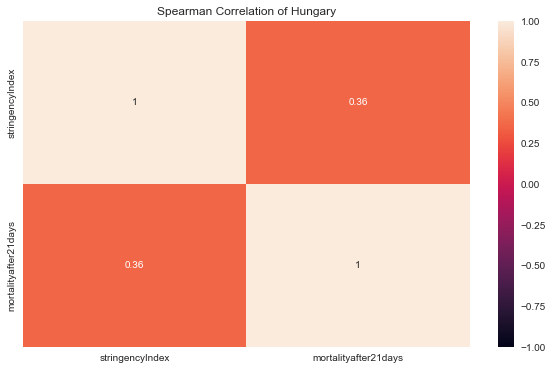

In [57]:
#Hungary spearman correlation
x_simple_Hungary = pd.DataFrame(df_Hungary,columns=["stringencyIndex","mortalityafter21days"])
my_rs = x_simple_Hungary.corr(method="spearman")
my_rp = x_simple_Hungary.corr(method="pearson")
print(my_rs)
print(my_rp)
def display_correlation(df_Hungary):
    r = df_Hungary.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_Hungary.corr(method="spearman"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Hungary")
    return(r)
r_simple=display_correlation(x_simple_Hungary)
def display_correlation(df_Hungary):
    r = df_Hungary.corr(method="pearson")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_Hungary.corr(method="pearson"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Hungary")
    return(r)
r_simple=display_correlation(x_simple_Hungary)

                      stringencyIndex  mortalityafter21days
stringencyIndex               1.00000               0.21045
mortalityafter21days          0.21045               1.00000
                      stringencyIndex  mortalityafter21days
stringencyIndex              1.000000              0.487478
mortalityafter21days         0.487478              1.000000


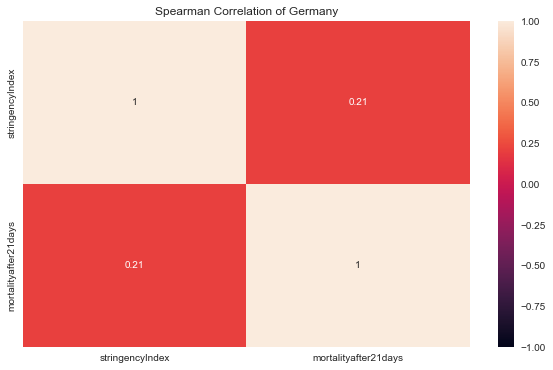

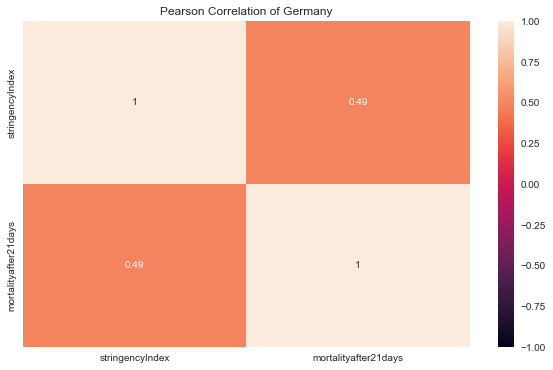

In [56]:
#Germany spearman correlation
x_simple_Germany = pd.DataFrame(df_Germany,columns=["stringencyIndex","mortalityafter21days"])
my_rs = x_simple_Germany.corr(method="spearman")
my_rp = x_simple_Germany.corr(method="pearson")
print(my_rs)
print(my_rp)
def display_correlation(df_Germany):
    r = df_Germany.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_Germany.corr(method="spearman"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Germany")
    return(r)
r_simple=display_correlation(x_simple_Germany)
def display_correlation(df_Germany):
    r = df_Germany.corr(method="pearson")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_Germany.corr(method="pearson"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Pearson Correlation of Germany")
    return(r)
r_simple=display_correlation(x_simple_Germany)

                      stringencyIndex  mortalityafter21days
stringencyIndex              1.000000              0.234152
mortalityafter21days         0.234152              1.000000
                      stringencyIndex  mortalityafter21days
stringencyIndex              1.000000              0.257647
mortalityafter21days         0.257647              1.000000


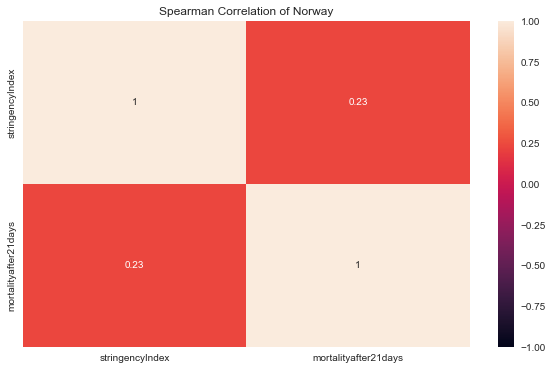

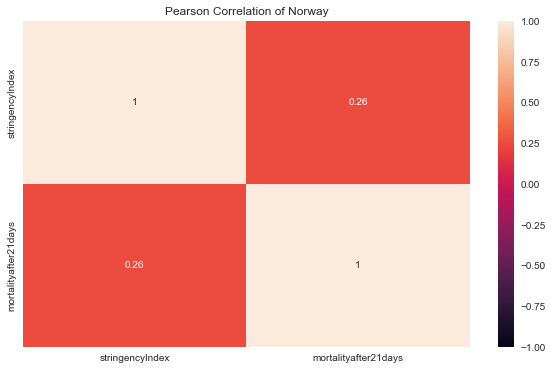

In [55]:
#Norway spearman correlation
x_simple_Norway = pd.DataFrame(df_Norway,columns=["stringencyIndex","mortalityafter21days"])
my_rs = x_simple_Norway.corr(method="spearman")
my_rp = x_simple_Norway.corr(method="pearson")
print(my_rs)
print(my_rp)
def display_correlation(df_Norway):
    r = df_Norway.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_Norway.corr(method="spearman"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Norway")
    return(r)
r_simple=display_correlation(x_simple_Norway)
def display_correlation(df_Norway):
    r = df_Norway.corr(method="pearson")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_Norway.corr(method="pearson"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Pearson Correlation of Norway")
    return(r)
r_simple=display_correlation(x_simple_Norway)

                      stringencyIndex  mortalityafter21days
stringencyIndex              1.000000              0.464942
mortalityafter21days         0.464942              1.000000
                      stringencyIndex  mortalityafter21days
stringencyIndex              1.000000              0.683246
mortalityafter21days         0.683246              1.000000


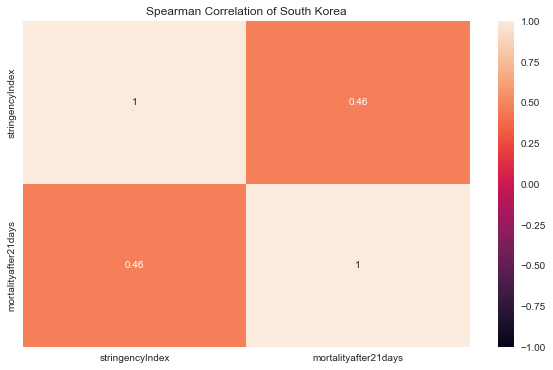

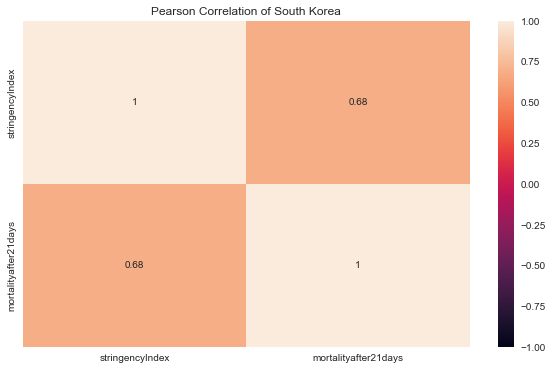

In [54]:
#South Korea spearman correlation
x_simple_South_Korea = pd.DataFrame(df_South_Korea,columns=["stringencyIndex","mortalityafter21days"])
my_rs = x_simple_South_Korea.corr(method="spearman")
my_rp = x_simple_South_Korea.corr(method="pearson")
print(my_rs)
print(my_rp)
def display_correlation(df_South_Korea):
    r = df_South_Korea.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_South_Korea.corr(method="spearman"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of South Korea")
    return(r)
r_simple=display_correlation(x_simple_South_Korea)
def display_correlation(df_South_Korea):
    r = df_South_Korea.corr()
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_South_Korea.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Pearson Correlation of South Korea")
    return(r)
r_simple=display_correlation(x_simple_South_Korea)

                      stringencyIndex  mortalityafter21days
stringencyIndex              1.000000              0.570386
mortalityafter21days         0.570386              1.000000
                      stringencyIndex  mortalityafter21days
stringencyIndex              1.000000              0.618894
mortalityafter21days         0.618894              1.000000


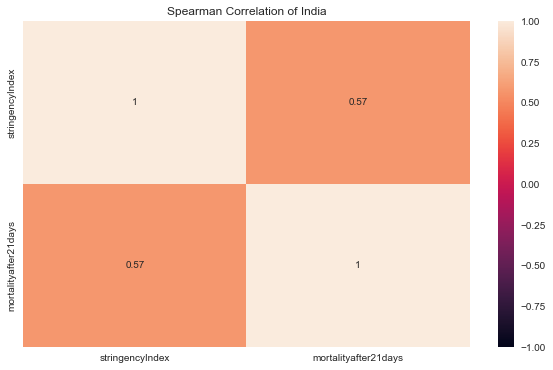

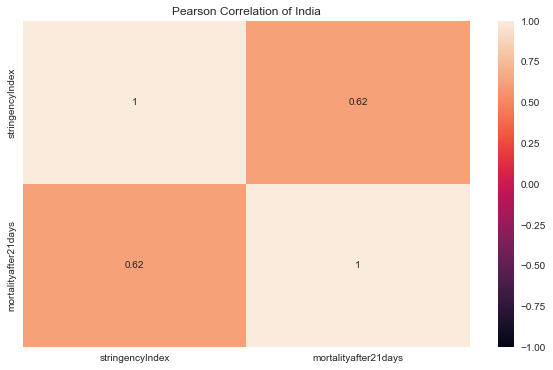

In [53]:
#India spearman correlation
x_simple_India = pd.DataFrame(df_India,columns=["stringencyIndex","mortalityafter21days"])
my_rs = x_simple_India.corr(method="spearman")
my_rp = x_simple_India.corr()
print(my_rs)
print(my_rp)
def display_correlation(df_India):
    r = df_India.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_India.corr(method="spearman"), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of India")
    return(r)
r_simple=display_correlation(x_simple_India)
def display_correlation(df_India):
    r = df_India.corr()
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df_India.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Pearson Correlation of India")
    return(r)
r_simple=display_correlation(x_simple_India)

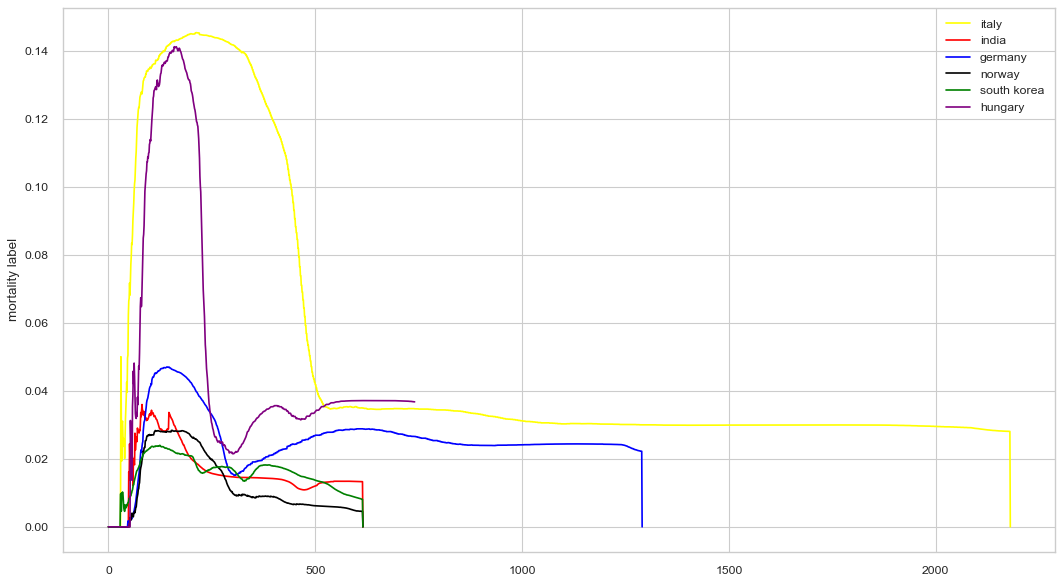

In [272]:
from matplotlib.pyplot import figure
fig,figure(figsize=(16,9),dpi=80)


ax = df_Italy["mortalityafter21days"].plot(  color="yellow")
df_India["mortalityafter21days"].plot( color="red",  ax=ax)
df_Germany["mortalityafter21days"].plot( color="blue", ax=ax)
df_Norway["mortalityafter21days"].plot(  color="black",  ax=ax)
df_South_Korea["mortalityafter21days"].plot(  color="green",  ax=ax)
df_Hungary["mortalityafter21days"].plot(  color="purple", ax=ax)
plt.legend(["italy","india","germany","norway","south korea","hungary"])
#ax.set_xlabel("strigency label")
ax.set_ylabel("mortality label")
plt.show()

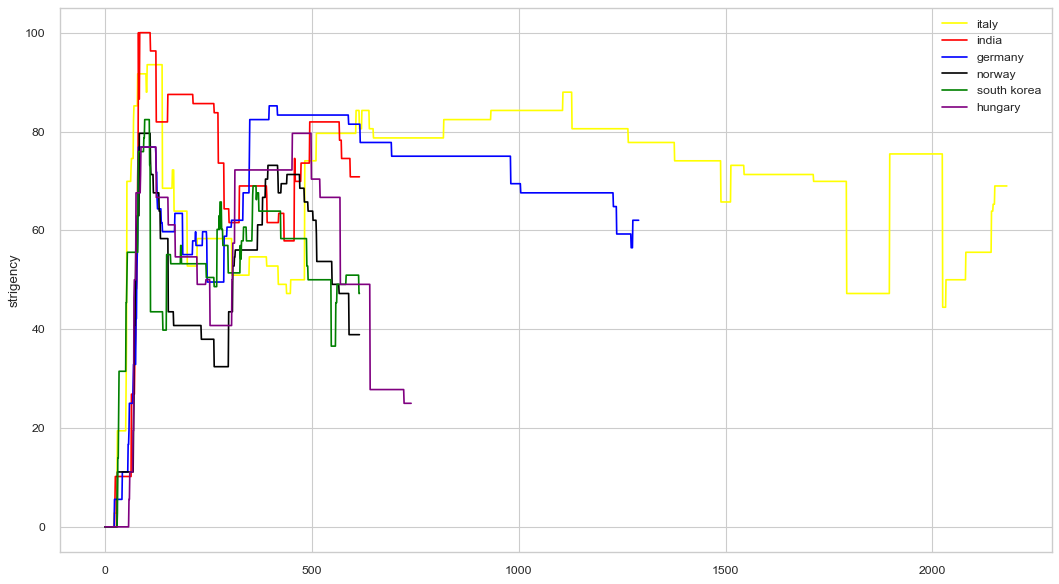

In [278]:
from matplotlib.pyplot import figure
fig,figure(figsize=(16,9),dpi=80)
ax=df_Italy["stringencyIndex"].plot(color="yellow")
df_India["stringencyIndex"].plot( color="red",  ax=ax)
df_Germany["stringencyIndex"].plot(color="blue",ax=ax)
df_Norway["stringencyIndex"].plot(color="black",ax=ax)
df_South_Korea["stringencyIndex"].plot(color="green",ax=ax)
df_Hungary["stringencyIndex"].plot(color="purple",ax=ax)

plt.legend(["italy","india","germany","norway","south korea","hungary"])

ax.set_ylabel("strigency")
plt.show()

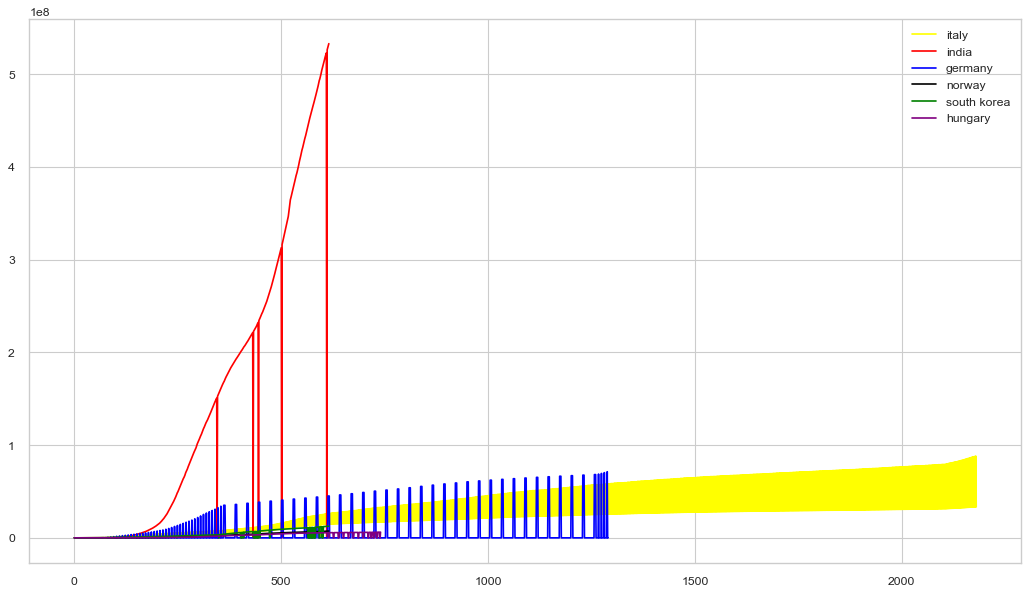

In [285]:
from matplotlib.pyplot import figure
fig,figure(figsize=(16,9),dpi=80)
ax=df_Italy["#testsTotal"].plot(color="yellow",label="1")
df_India["#testsTotal"].plot(color="red",label="2")
df_Germany["#testsTotal"].plot(color="blue",label="3")
df_Norway["#testsTotal"].plot(color="black",label="4")
df_South_Korea["#testsTotal"].plot(color="green",label="5")
df_Hungary["#testsTotal"].plot(color="purple",label="6")

plt.legend(["italy","india","germany","norway","south korea","hungary"])
plt.show()

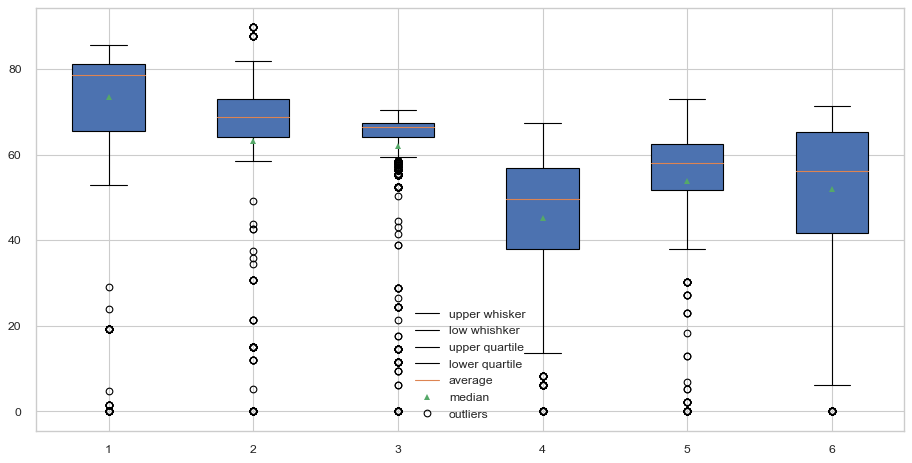

In [327]:
#Plot mean and standard deviation
import itertools
from matplotlib import pyplot
from matplotlib.pyplot import figure
fig, figure(figsize=(14,7),dpi=80)
x1 = df_Italy["governmentResponseIndex"]
x2 = df_India["governmentResponseIndex"] 
x3 = df_Germany["governmentResponseIndex"]
x4 = df_Norway["governmentResponseIndex"]
x5 = df_South_Korea["governmentResponseIndex"]
x6 = df_Hungary["governmentResponseIndex"]

plt.boxplot(x=[x1,x2,x3,x4,x5,x6],  whis=None,  patch_artist=True, meanline=None, showmeans=True, boxprops=None, labels=None)
plt.legend(["upper whisker","low whishker","upper quartile","lower quartile","average","median","outliers"])

#ax.xlabel("country")
#ax.ylabel("population")
plt.show()

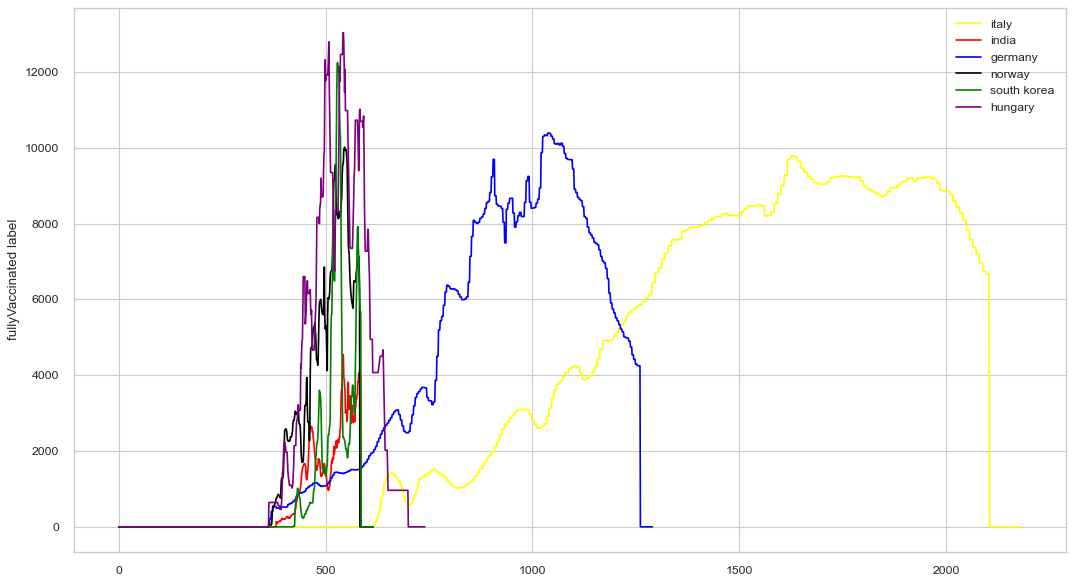

In [320]:
fig,figure(figsize=(16,9),dpi=80)

ax = df_Italy["#dailyVaccinationsPerMillion"].plot(  color="yellow")
df_India["#dailyVaccinationsPerMillion"].plot( color="red",  ax=ax)
df_Germany["#dailyVaccinationsPerMillion"].plot( color="blue", ax=ax)
df_Norway["#dailyVaccinationsPerMillion"].plot(  color="black",  ax=ax)
df_South_Korea["#dailyVaccinationsPerMillion"].plot(  color="green",  ax=ax)
df_Hungary["#dailyVaccinationsPerMillion"].plot(  color="purple", ax=ax)
plt.legend(["italy","india","germany","norway","south korea","hungary"])
#ax.set_xlabel("strigency label")
ax.set_ylabel("fullyVaccinated label")
plt.show()

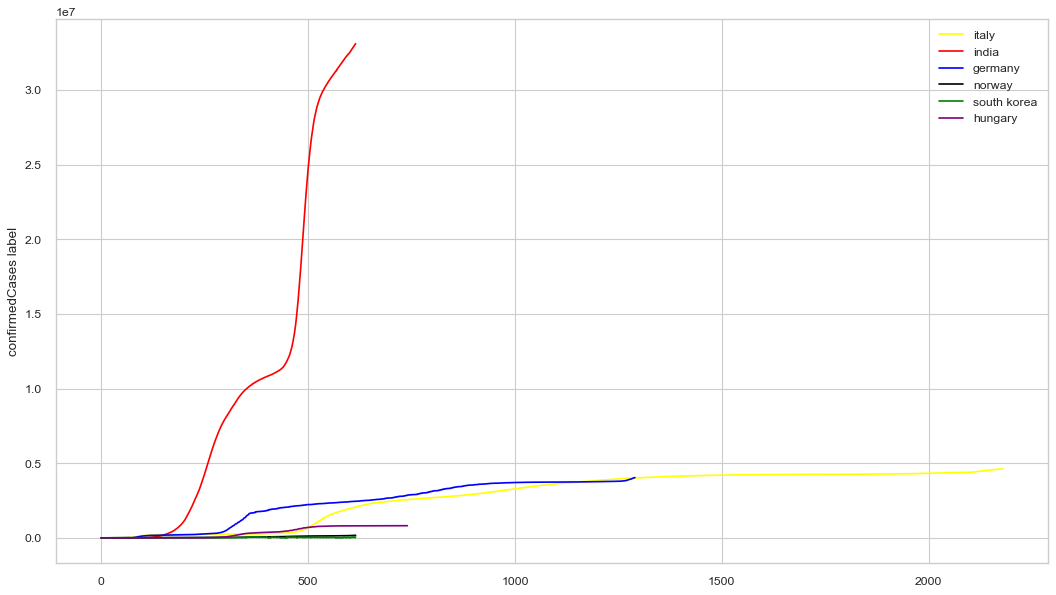

In [324]:
fig,figure(figsize=(16,9),dpi=80)

ax = df_Italy["#confirmedCases"].plot(  color="yellow")
df_India["#confirmedCases"].plot( color="red",  ax=ax)
df_Germany["#confirmedCases"].plot( color="blue", ax=ax)
df_Norway["#confirmedCases"].plot(  color="black",  ax=ax)
df_South_Korea["#dailyTests"].plot(  color="green",  ax=ax)
df_Hungary["#confirmedCases"].plot(  color="purple", ax=ax)
plt.legend(["italy","india","germany","norway","south korea","hungary"])
#ax.set_xlabel("strigency label")
ax.set_ylabel("confirmedCases label")
plt.show()

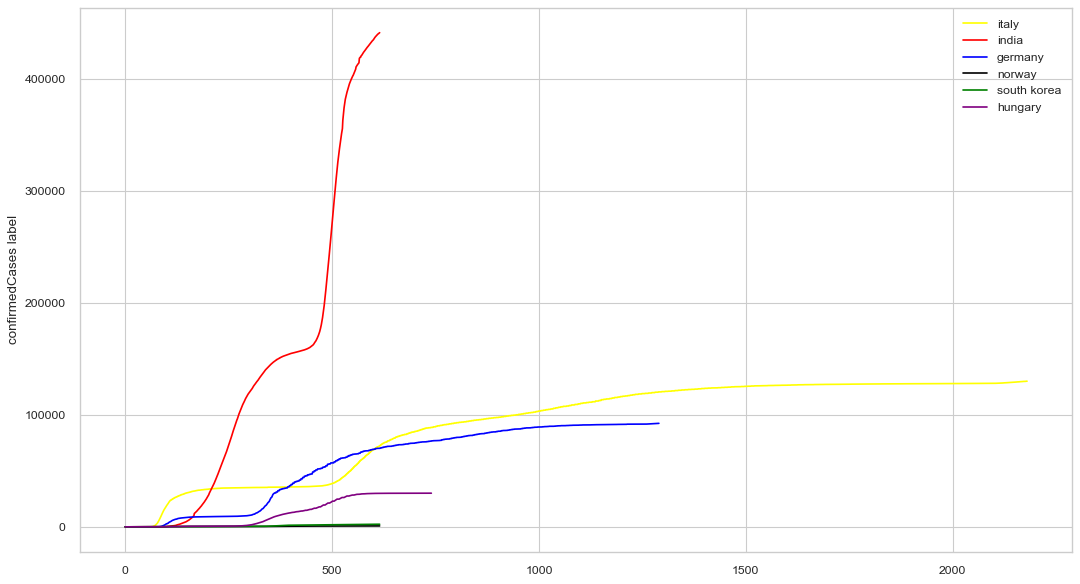

In [325]:
fig,figure(figsize=(16,9),dpi=80)

ax = df_Italy["#confirmedDeaths"].plot(  color="yellow")
df_India["#confirmedDeaths"].plot( color="red",  ax=ax)
df_Germany["#confirmedDeaths"].plot( color="blue", ax=ax)
df_Norway["#confirmedDeaths"].plot(  color="black",  ax=ax)
df_South_Korea["#confirmedDeaths"].plot(  color="green",  ax=ax)
df_Hungary["#confirmedDeaths"].plot(  color="purple", ax=ax)
plt.legend(["italy","india","germany","norway","south korea","hungary"])
#ax.set_xlabel("strigency label")
ax.set_ylabel("confirmedCases label")
plt.show()

In [298]:
df_Italy.columns

Index(['country', 'date', 'population', 'urbanPop%', '#dailyTests',
       '#testsTotal', '#dailyTestsPerThousand', '#testsTotalPerThousand',
       '#tests7daySmooth', '#tests7daySmoothPerThousand', 'positiveRate',
       'positiveRatePerCase', '#dailyVaccinationsRaw', '#dailyVaccinations',
       '#dailyVaccinationsPerMillion', '#vaccinations',
       '#vaccinationsPerHundred', '#peopleVaccinated',
       '#peopleVaccinatedPerHundred', '#fullyVaccinated',
       '#fullyVaccinatedPerHundred', '#confirmedCases', '#confirmedDeaths',
       'stringencyIndex', 'governmentResponseIndex', 'containmentHealthIndex',
       'economicSupportIndex', 'C1SchoolClosing', 'C2WorkplaceClosing',
       'C3CancelPublicEvents', 'C4RestrictionsOnGatherings',
       'C5ClosePublicTransport', 'C6StayAtHomeRequirements',
       'C7RestrictionsOnInternalMovement', 'C8InternationalTravel Controls',
       'E1IncomeSupport', 'E2Debt/contractRelief', 'E3FiscalMeasures',
       'E4InternationalSupport', 'H1Publi